In [1]:
## Mount Google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Set file path and Setup tools

In [2]:
!ls drive/My\ Drive/computing/Pyhep/Coffea/Data
files = 'drive/My Drive/computing/Pyhep/Coffea/Data/Zee_Step4_nano.root'

scheme4_nano.root  Zee_Step4_nano.root


In [ ]:
!pip install coffea

In [4]:
import numpy as np
import awkward as ak
from coffea.nanoaod import NanoEvents
from uproot_methods import TLorentzVectorArray
import time

###2. JaggedArray based analysis

In [5]:
## Read events
events = NanoEvents.from_file(files)

In [6]:
## Read Electron
Electron = events.Electron

In [7]:
## Electron selection cut criteria ( We call it Electron cut-mask)
Electron_mask = (Electron.pt >20) & (np.abs(Electron.eta) < 2.5) & (Electron.cutBased > 3) 
Electron_mask 

<JaggedArray [[True] [True False] [True False] ... [True True] [False] [False]] at 0x7f56c6a4ca90>

In [8]:
## Apply Electron selection cut mask
Sel_Electron = Electron[Electron_mask]

In [9]:
## Helper function to make Electron-array include P4 ( This code needs study )
def make_labeled_p4(x, indices, itype):
    p4 = TLorentzVectorArray.from_ptetaphim(x.pt, x.eta, x.phi, x.mass)
    return ak.JaggedArray.zip(p4=p4,
                              flavor=itype*x.pt.ones_like().astype(np.int),
                              pidx=indices,
                              charge=x.charge)

In [10]:
## Electron array with P4 
sel_electrons_indices = ak.JaggedArray.fromoffsets(Sel_Electron.pt.offsets, 
                                             np.arange(0, Sel_Electron.pt.content.size)) - Sel_Electron.pt.offsets[:-1]
Sel_Electron_P4 =  make_labeled_p4(Sel_Electron, sel_electrons_indices, 1)

In [11]:
## Choose two electron in each events
Sel_Electron_pair = Sel_Electron_P4.choose(2)

In [12]:
## Calculate Electron mass
Mass_ee = (Sel_Electron_pair.i0.p4 + Sel_Electron_pair.i1.p4).mass

In [15]:
## Flatten the Jagged array to 1d array
hist_Mass_ee = Mass_ee.content
print(hist_Mass_ee,len(hist_Mass_ee))

### 3. Visualization

In [19]:
import mplhep as hep
import matplotlib.pyplot as plt

In [20]:
hep.set_style(hep.style.CMS)

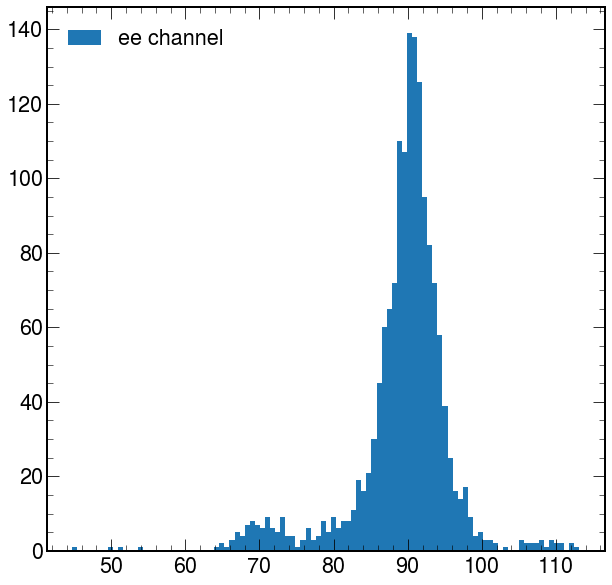

In [24]:
plt.hist(hist_Mass_ee,bins=100,label='ee channel')
plt.legend()